<a href="https://colab.research.google.com/github/ivsantiagocz/Entrega-2/blob/main/Talbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from numpy.fft import fft2, fftshift, ifft2 

In [ ]:
def smask(N,T):
  mask=np.zeros((N,N))
  for i in range(0,N):
    for j in range(0,N):
       mask[i,j] = ((1/2)*(1+2*np.cos(((2*np.pi*j)/T))))
  return mask

In [ ]:
wl= 633e-6
L= 10 #medida en milimetros del objeto
N= 1024  #numero de particiones del objeto
dx= L/N #tamaño de particiones del objeto
T=5*dx
No=3
z=No*(T**2)/(wl)
ut= smask(N,T)

hh= np.zeros((N,N))*np.exp(-1j*0)
print ("z=", z)

k=(2*np.pi)/wl
print(T)

z= 11.299458725192535
0.048828125


z está en el domino de aplicación de ID de EA


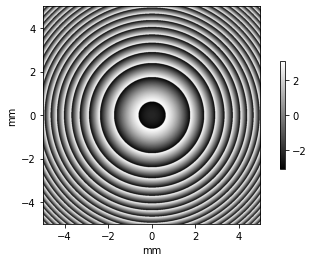

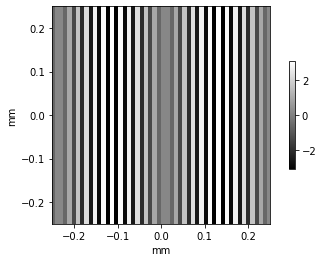

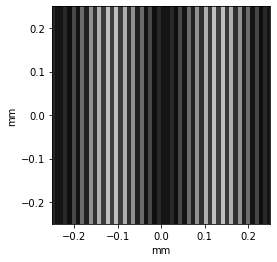

In [ ]:
if (z>=(N*(dx)**2)/wl):
    print("z está en el dominio de aplicación de DD de FF")
    for t in range(int(-N/2),int(N/2)):
                for s in range(int(-N/2),int(N/2)):
        
                    h= np.exp(1j*k*((dx*t)**2 + (dx*s)**2)/(2*z))
                    hh[t,s]=h 
                             
    hh=np.fft.fftshift(hh)
    Ut = ut*hh
                
    U1=np.fft.fft2(Ut)
    Uf=np.fft.fftshift(U1)
    U=abs(Uf)
    UU=U*U
    
    plt.figure(figsize=(7,4))
    plt.imshow(np.angle(hh),cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
    plt.ylabel('mm')
    plt.xlabel('mm')
    plt.show()



    plt.figure(figsize=(7,4))
    plt.imshow((ut),cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
    plt.ylabel('mm')
    plt.xlabel('mm')
    plt.show()

    zoom=8
    plt.figure(figsize=(7,4))
    plt.xlim(-1/zoom,1/zoom)
    plt.ylim(-1/zoom,1/zoom)
    plt.imshow(UU,cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
    plt.ylabel('mm')
    plt.xlabel('mm')
    #plt.grid(True)
    plt.show()
else:
    print("z está en el domino de aplicación de ID de EA")
    for t in range(int(-N/2),int(N/2)):
                for s in range(int(-N/2),int(N/2)):
        
                    h= np.exp(1j*k*z*np.sqrt(1-(wl**2)*((t/(N*dx))**2 + (s/(N*dx))**2)))
                    hh[t,s]=h 

    h1=np.fft.fftshift(hh)
    gt=np.fft.fftshift(np.fft.fft2(ut))

                             
    Ut = gt*h1
    
    
    U1=np.fft.ifft2(Ut)
    Uf=np.fft.fftshift(U1)
    UU=abs(U1*U1)
    #UU=U*U
    #I = Image.fromarray(abs(U), 'P')
    plt.figure(figsize=(7,4))
    im1 = plt.imshow(np.angle(h1),cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
    plt.ylabel('mm')
    plt.xlabel('mm')
    plt.colorbar(im1,shrink=0.5)
    plt.show()

    zoom=4
    plt.figure(figsize=(7,4))
    plt.xlim(-1/zoom,1/zoom)
    plt.ylim(-1/zoom,1/zoom)
    im3 = plt.imshow((ut),cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
    plt.ylabel('mm')
    plt.xlabel('mm')
    plt.colorbar(im1,shrink=0.5)
    plt.show()


    zoom=4
    plt.figure(figsize=(7,4))
    plt.xlim(-1/zoom,1/zoom)
    plt.ylim(-1/zoom,1/zoom)
    im2 = plt.imshow(UU,cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
    plt.ylabel('mm')
    plt.xlabel('mm')
    #plt.grid(False)
    plt.show()